In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TensorNetwork import TensorNetwork as TN
from QFTMPO import QFTMPO
from prepare_network import *

# MPS Construction Runtime

In [2]:
N = (5, 10, 20, 50, 100, 1000)
times = []
for n in N:
    mps, t = prepare_mps(N=n)
    times.append(t)
    
print(times)

[0.107, 0.022, 0.037, 0.09000000000000001, 0.182, 1.811]


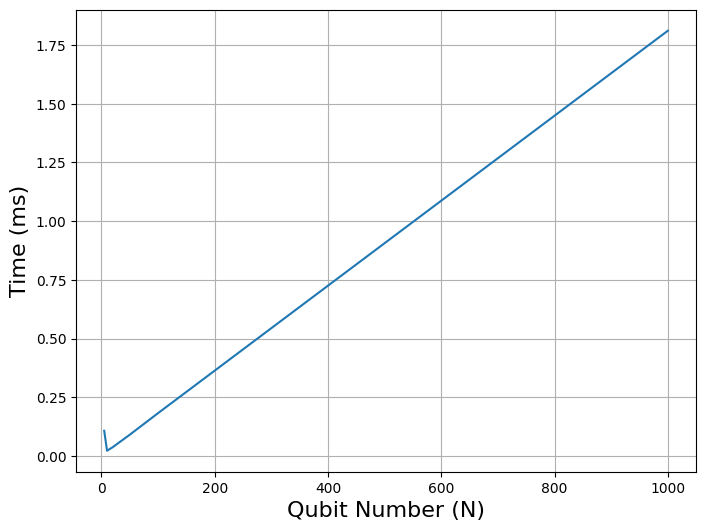

In [3]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("MPS Construction Time", fontsize=20)
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Time (ms)", fontsize=16)

#plt.xlim(left=10, right=1000)

plt.plot(N, times)
plt.show()

# QFT-MPO Construction Runtime

### Unbounded bond dimensions:

In [4]:
N = (4, 6, 8, 10, 12, 14)
MPOs = []
times = []
for n in N:
    mpo, t = prepare_mpo(N=n, max_bond=None)
    MPOs.append(mpo)
    times.append(t)
    
print(times)

[17.357999999999997, 2.383, 48.755, 561.531, 6640.036, 84617.45000000001]


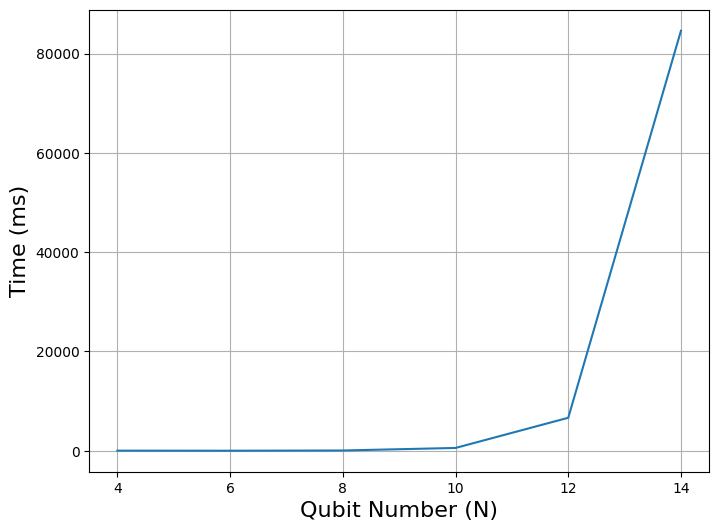

In [5]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO Construction Time without Limitation", fontsize=20)
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Time (ms)", fontsize=16)

#plt.yscale("log")

plt.plot(N, times)
plt.show()

[4, 16, 32, 64, 256, 512]


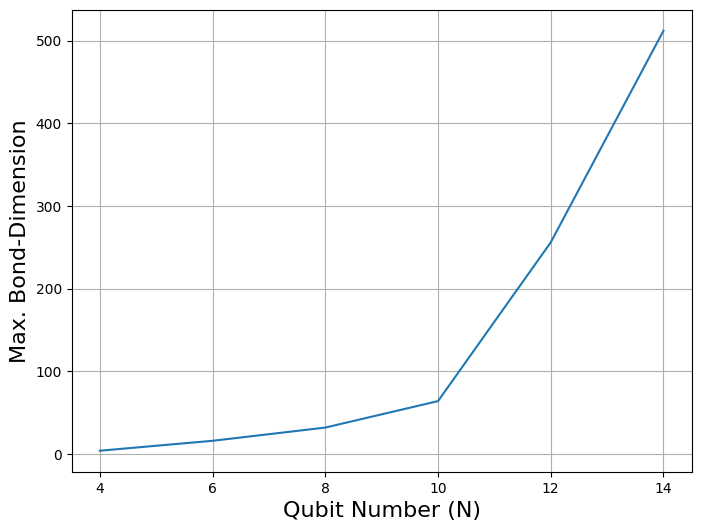

In [6]:
max_dims = [max(mpo.get_bond_dims()) for mpo in MPOs]
print(max_dims)

plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("Maximum Bond-Dimension in QFT-MPO Network", fontsize=20)
plt.xlabel("Qubit Number (N)", fontsize=16)
plt.ylabel("Max. Bond-Dimension", fontsize=16)

plt.plot(N, max_dims)
plt.show()

### Bounded bond dimensions

In [7]:
N = (4, 8, 16, 32, 64, 128)
max_bond = (8, 16, 64, 128, 256, 512, 2048, 2048*8)

times_N = []
for n in N:
    times = []
    for bond in max_bond:
        _, t = prepare_mpo(N=n, max_bond=bond)
        times.append(t)
    times_N.append(times)
    print(f"N={n}: {times}")

N=4: [15.905, 0.304, 0.266, 0.257, 0.257, 0.254, 0.256, 0.254]
N=8: [2.8240000000000003, 2.128, 1.618, 1.58, 1.631, 1.658, 1.675, 1.631]
N=16: [8.654, 7.984, 7.691, 7.397, 7.630999999999999, 7.3629999999999995, 6.952, 6.958]
N=32: [32.075, 30.924, 30.997, 30.802, 32.105000000000004, 32.464, 30.972, 30.578]
N=64: [135.789, 132.433, 130.591, 130.802, 130.27700000000002, 129.908, 130.405, 130.39100000000002]
N=128: [540.472, 541.578, 539.697, 537.396, 538.4010000000001, 538.8589999999999, 537.712, 539.044]


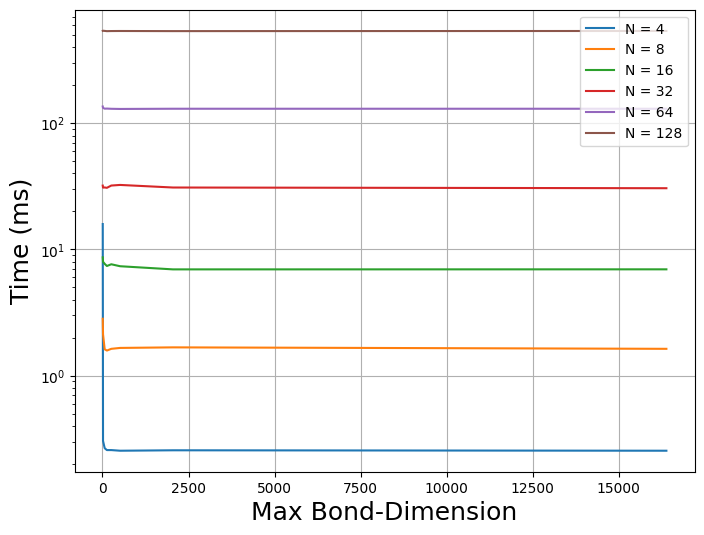

In [8]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO Construction Time with Bounded Bond-Dimensions")
plt.xlabel("Max Bond-Dimension", fontsize=18)
plt.ylabel("Time (ms)", fontsize=18)

for i, lst in enumerate(times_N):
    plt.plot(max_bond, lst, label=f"N = {N[i]}")

plt.yscale("log")

plt.legend(loc="upper right")
plt.show()

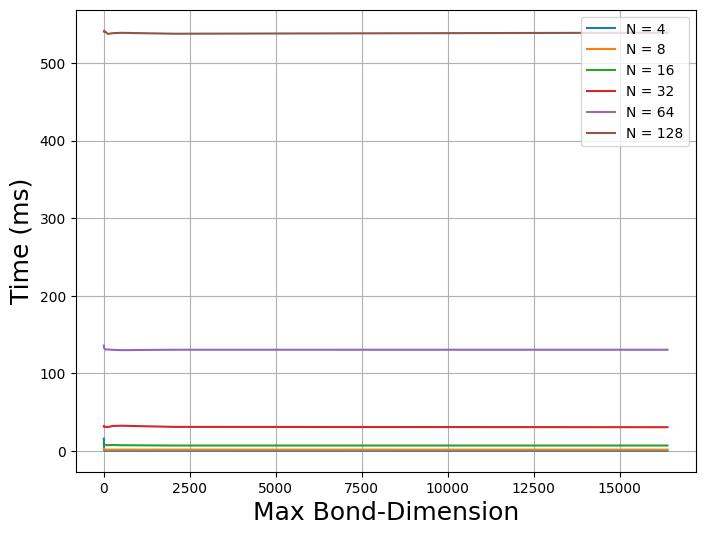

In [9]:
plt.figure(figsize=(8, 6))
plt.grid()

#plt.title("QFT-MPO Construction Time with Bounded Bond-Dimensions")
plt.xlabel("Max Bond-Dimension", fontsize=18)
plt.ylabel("Time (ms)", fontsize=18)

for i, lst in enumerate(times_N):
    plt.plot(max_bond, lst, label=f"N = {N[i]}")

#plt.yscale("log")

plt.legend(loc="upper right")
plt.show()

10479.166
13851.485999999999
23017.375
37191.659999999996
36148.279
36121.254


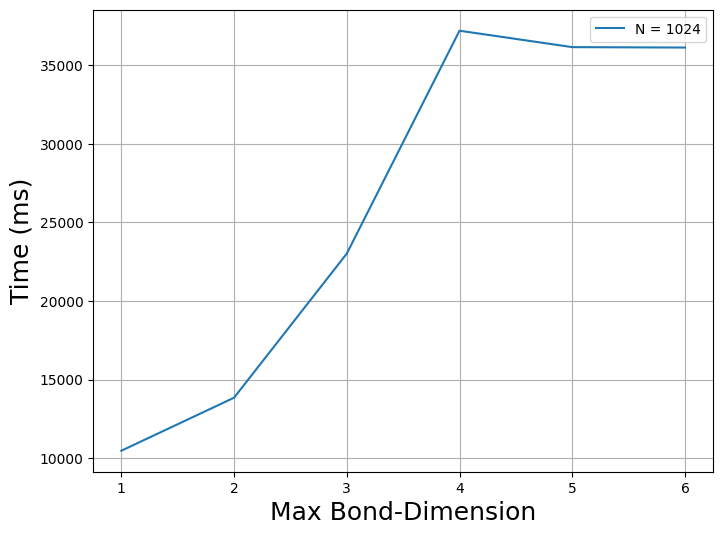

In [27]:
N = 1024
max_bond = (1, 2, 3, 4, 5, 6)

times = []
for bond in max_bond:
    _, t = prepare_mpo(N=N, max_bond=bond)
    times.append(t)
    print(t)
    
plt.figure(figsize=(8, 6))
plt.grid()

plt.xlabel("Max Bond-Dimension", fontsize=18)
plt.ylabel("Time (ms)", fontsize=18)

plt.plot(max_bond, times, label=f"N = {N}")
plt.legend(loc="upper right")
plt.show()

377.242
428.911
406.02
437.162
478.135
523.3389999999999
577.696
606.741
665.129
705.0300000000001
756.79
802.122
876.8979999999999
919.9300000000001
971.8449999999999
1024.759
1083.778
1152.6570000000002
1212.987
1275.8799999999999


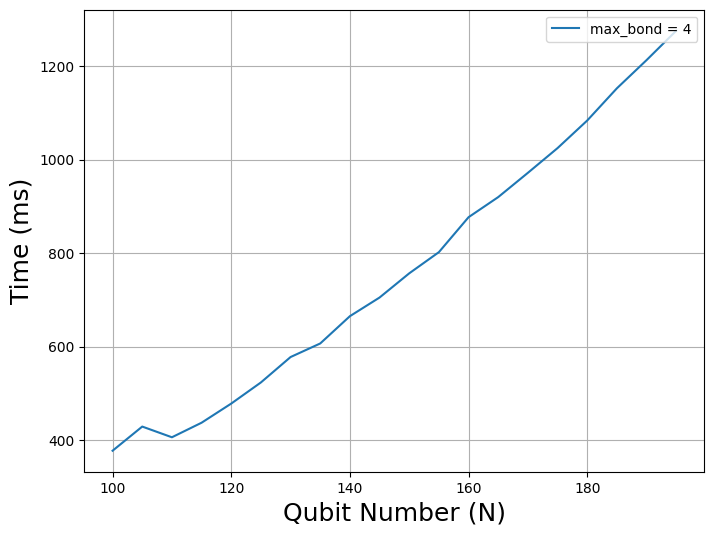

In [32]:
N = list(range(100, 200, 5))

max_bond = 4

times = []
for n in N:
    _, t = prepare_mpo(N=n, max_bond=max_bond)
    times.append(t)
    print(t)
    
plt.figure(figsize=(8, 6))
plt.grid()

plt.xlabel("Qubit Number (N)", fontsize=18)
plt.ylabel("Time (ms)", fontsize=18)

plt.plot(N, times, label=f"max_bond = {max_bond}")
plt.legend(loc="upper right")
plt.show()